In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kagglehub

In [ ]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2025-06-03 20:35:46--  https://raw.githubusercontent.com/Ayush8757/PlantDiseasesDetection/refs/heads/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4846 (4.7K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   4.73K  --.-KB/s    in 0s      

2025-06-03 20:35:46 (63.7 MB/s) - ‘helper_function.py’ saved [4846/4846]



In [ ]:
import helper_function

In [ ]:
import tensorflow_datasets as tfds
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "plant_village"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'plant_village' in TensorFlow Datasets: True


In [ ]:
import tensorflow_datasets as tfds

# Load the entire dataset as "train"
train_data, ds_info = tfds.load(
    name="plant_village",
    split="train",  # Load the entire dataset as "train"
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Manually split the data into training and testing sets
num_samples = ds_info.splits['train'].num_examples
num_test_samples = int(0.2 * num_samples)  # Use 15% for testing
num_train_samples = num_samples - num_test_samples

test_data = train_data.take(num_test_samples)
train_data = train_data.skip(num_test_samples)

# Now you have train_data and test_data variables
print(f"Training data size: {num_train_samples}")
print(f"Testing data size: {num_test_samples}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.O6LNL3_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
Training data size: 43443
Testing data size: 10860


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=38),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry___healthy',
 'Cherry___Powdery_mildew',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___healthy',
 'Corn___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomat

In [ ]:
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from PlantVillage (tensor form): {label}
  Class name (str form): {class_names[label.numpy()] if 0 <= label.numpy() < len(class_names) else 'Unknown Class'}
        """) # Check if label.numpy() is within the valid range of class_names indices


  Image shape: (256, 256, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from PlantVillage (tensor form): 9
  Class name (str form): Corn___healthy
        


In [ ]:
image

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[ 92, 143, 112],
        [ 91, 142, 111],
        [ 89, 139, 110],
        ...,
        [101, 160, 128],
        [102, 161, 129],
        [102, 161, 129]],

       [[ 90, 140, 111],
        [ 89, 139, 110],
        [ 88, 138, 109],
        ...,
        [103, 162, 130],
        [102, 161, 129],
        [102, 161, 129]],

       [[ 86, 136, 109],
        [ 86, 136, 109],
        [ 84, 137, 109],
        ...,
        [105, 164, 132],
        [103, 162, 130],
        [102, 161, 129]],

       ...,

       [[108, 167, 119],
        [109, 169, 118],
        [111, 171, 119],
        ...,
        [130, 168, 153],
        [127, 163, 149],
        [125, 159, 145]],

       [[102, 162, 111],
        [103, 163, 111],
        [105, 165, 111],
        ...,
        [131, 165, 151],
        [122, 154, 141],
        [114, 144, 132]],

       [[ 97, 157, 105],
        [ 99, 159, 105],
        [101, 161, 107],
        ...,
        [129, 161, 14

In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=44>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

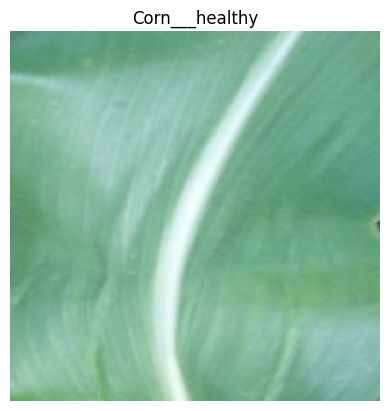

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 92 143 112]
  [ 91 142 111]
  [ 89 139 110]
  ...
  [101 160 128]
  [102 161 129]
  [102 161 129]]

 [[ 90 140 111]
  [ 89 139 110]
  [ 88 138 109]
  ...
  [103 162 130]
  [102 161 129]
  [102 161 129]]]...,
Shape: (256, 256, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 91.78571  142.7143   111.85715 ]
  [ 90.44388  141.17348  110.71429 ]
  [ 87.525505 138.59694  109.29082 ]
  ...
  [101.14286  160.14285  128.14285 ]
  [101.81633  160.81633  128.81633 ]
  [102.       161.       129.      ]]

 [[ 89.08674  139.08673  110.515305]
  [ 88.09694  138.2347   109.61735 ]
  [ 86.37755  137.86224  109.35714 ]
  ...
  [103.5051   162.5051   130.5051  ]
  [102.47448  161.47449  129.47449 ]
  [102.015305 161.0153   129.0153  ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


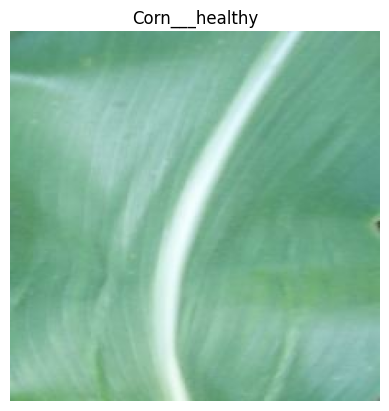

In [ ]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.weights.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing

# NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [ ]:
# Create a function to recreate the original model outside of the fit method
from tensorflow.keras.layers import Dropout
def create_model():
    input_shape = (224, 224, 3)
    base_model = tf.keras.applications.MobileNetV3Large(include_top=False, minimalistic=False)
    base_model.trainable = False  # freeze base model layers

    # Create Functional model
    inputs = layers.Input(shape=input_shape, name="input_layer")
    # Add in data augmentation Sequential model as a layer
    x = data_augmentation(inputs)
    x = Dropout(0.3)(x)
    x = base_model(inputs, training=False)  # set base_model to inference mode only
    x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
    x = layers.Dense(len(class_names))(x)  # want one output neuron per class
    outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

# Create the model before fitting
model = create_model()

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Continue with the rest of your code

/usr/local/lib/python3.11/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_layer                   │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        36,518 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_2 (Cast)                   │ (None, 38)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_float32 (Activation)    │ (None, 38)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,032,870 (11.57 MB)

 Trainable params: 36,518 (142.65 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [ ]:
from helper_function import create_tensorboard_callback

# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
# history = model.fit(train_data,
#                     epochs=5,
#                     steps_per_epoch=len(train_data),
#                     validation_data=test_data,
#                     validation_steps=int(0.25 * len(test_data)),
#                     callbacks=[create_tensorboard_callback("training_logs","EfficientNetV2B3_PlantVillage"),
#                                model_checkpoint])

In [ ]:
# Evaluate model (unsaved version) on whole test dataset
# results_feature_extract_model = model.evaluate(test_data)
# results_feature_extract_model

In [ ]:
# created_model = create_model()
# created_model.compile(loss="sparse_categorical_crossentropy",
#                       optimizer=tf.keras.optimizers.Adam(),
#                       metrics=["accuracy"])

# # 3. Load the saved weights
# created_model.load_weights(checkpoint_path)

# # 4. Evaluate the model with loaded weights
# results_created_model_with_loaded_weights = created_model.evaluate(test_data)

In [ ]:
# assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close
# results_created_model_with_loaded_weights

In [ ]:
for layer in model.layers:
    layer.trainable = False

# Unfreeze only the last 10 layers
for layer in model.layers[-10:]:
    layer.trainable = True

# Print layer details to verify
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)


input_layer True float32 <DTypePolicy "mixed_float16">
MobileNetV3Large True float32 <DTypePolicy "mixed_float16">
pooling_layer True float32 <DTypePolicy "mixed_float16">
dense True float32 <DTypePolicy "mixed_float16">
softmax_float32 True float32 <DTypePolicy "float32">


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/First.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(0.001), # 10x lower learning rate than the default
              metrics=["accuracy"])

In [ ]:
# Start to fine-tune (all layers)
history01 = model.fit(train_data,
                      epochs=100, # fine-tune for a maximum of 100 epochs
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25 * len(test_data)), # validation during training on 15% of test data
                      callbacks=[create_tensorboard_callback("training_logs", "MobileNetV3Large_PlantVillageMain"), # track the model training logs
                                 model_checkpoint, # save only the best model during training
                                 early_stopping, # stop model after X epochs of no improvements
                                 reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931
Epoch 1/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 228s 93ms/step - accuracy: 0.9088 - loss: 0.3389 - val_accuracy: 0.8846 - val_loss: 4.7066 - learning_rate: 0.0010
Epoch 2/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 80ms/step - accuracy: 0.9804 - loss: 0.0628 - val_accuracy: 0.9408 - val_loss: 1.7230 - learning_rate: 0.0010
Epoch 3/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9860 - loss: 0.0447 - val_accuracy: 0.0886 - val_loss: nan - learning_rate: 0.0010
Epoch 4/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9849 - loss: 0.0489 - val_accuracy: 0.9592 - val_loss: 0.2322 - learning_rate: 0.0010
Epoch 5/100
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9902 - loss: 0.0308 - val_accuracy: 0.7989 - val_loss: 11.5459 - learning_rate: 0.0010
Epoch 6/100
1357/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9861 - loss: 0.0489
Epoch 6: ReduceLROnPlateau r

In [ ]:
model.save("/content/drive/My Drive/MobileNetV3Large_plant_village_model.h5")

In [ ]:
model.save("/content/drive/My Drive/MobileNetV3Large_village_model.keras")

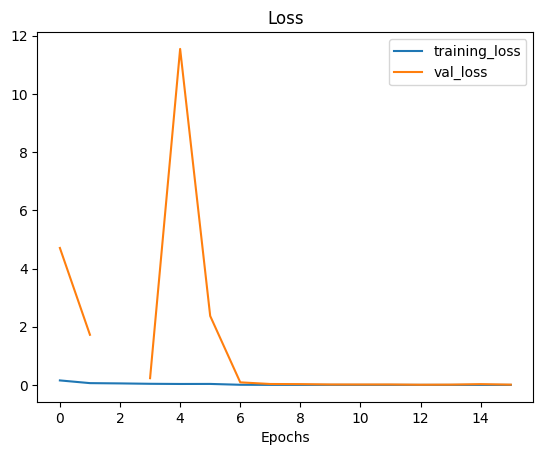

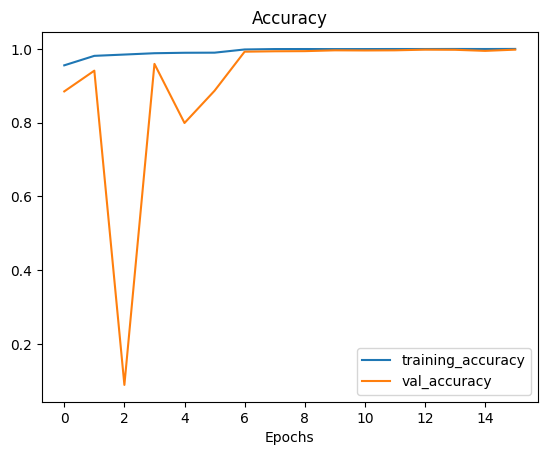

In [ ]:
from helper_function import plot_loss_curves
plot_loss_curves(history01)

In [ ]:
!zip -r model_checkpoint.zip /content/fine_tune_checkpoints
from google.colab import files
files.download("model_checkpoint.zip")

  adding: content/fine_tune_checkpoints/ (stored 0%)
  adding: content/fine_tune_checkpoints/First.keras (deflated 15%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r training_logs.zip /content/training_logs
files.download("training_logs.zip")


  adding: content/training_logs/ (stored 0%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/ (stored 0%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931/ (stored 0%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931/train/ (stored 0%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931/train/events.out.tfevents.1748983171.6e5eec7c4c40.3117.0.v2 (deflated 96%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931/validation/ (stored 0%)
  adding: content/training_logs/MobileNetV3Large_PlantVillageMain/20250603-203931/validation/events.out.tfevents.1748983390.6e5eec7c4c40.3117.1.v2 (deflated 75%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.evaluate(test_data)

340/340 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.9982 - loss: 0.0079


[0.009702393785119057, 0.9977900385856628]

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.9982 - loss: 0.0080
Test Accuracy: 99.78%
